In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sample_points_in_circle(center, radius, n_points):
    """Uniformly sample points within a circle around a center."""
    angles = np.random.uniform(0, 2 * np.pi, n_points)
    radii = radius * np.sqrt(np.random.uniform(0, 1, n_points))  # sqrt for uniformity in area
    x = center[0] + radii * np.cos(angles)
    y = center[1] + radii * np.sin(angles)
    return x, y

def generate_circular_clusters(n_clusters=5, points_per_cluster=70, cluster_radius=1.0, spread_radius=8):
    np.random.seed(42)

    angles = np.linspace(0, 2 * np.pi, n_clusters, endpoint=False)
    cluster_centers = [(spread_radius * np.cos(a), spread_radius * np.sin(a)) for a in angles]

    x_all, y_all = [], []
    for center in cluster_centers:
        x, y = sample_points_in_circle(center, cluster_radius, points_per_cluster)
        x_all.extend(x)
        y_all.extend(y)

    return np.array(x_all), np.array(y_all)

In [3]:
x1, x2 = generate_circular_clusters(spread_radius=2)

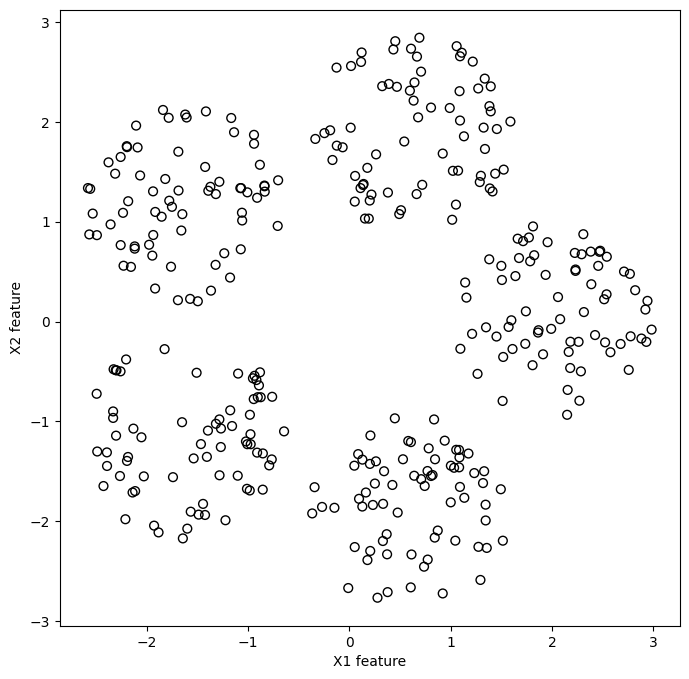

In [5]:
plt.figure(figsize=(8, 8))
plt.scatter(x1, x2, edgecolors='black', facecolors='none', s=40)
plt.xlabel("X1 feature")
plt.ylabel("X2 feature")
plt.show()

In [6]:
X = np.hstack([x1.reshape(-1, 1), x2.reshape(-1, 1)])
print(X.shape)

(350, 2)


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans